<a href="https://colab.research.google.com/github/kainight0/HWProj/blob/main/TheFashion_MNISTDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the Dataset**

In [388]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

**Check Dimensions of training set**

In [389]:
X_train.shape

(60000, 28, 28)

In [390]:
y_train.shape

(60000,)

In [391]:
X_test.shape

(10000, 28, 28)

In [392]:
y_test.shape

(10000,)

**Display Training Set images**

In [393]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**Visualize data**

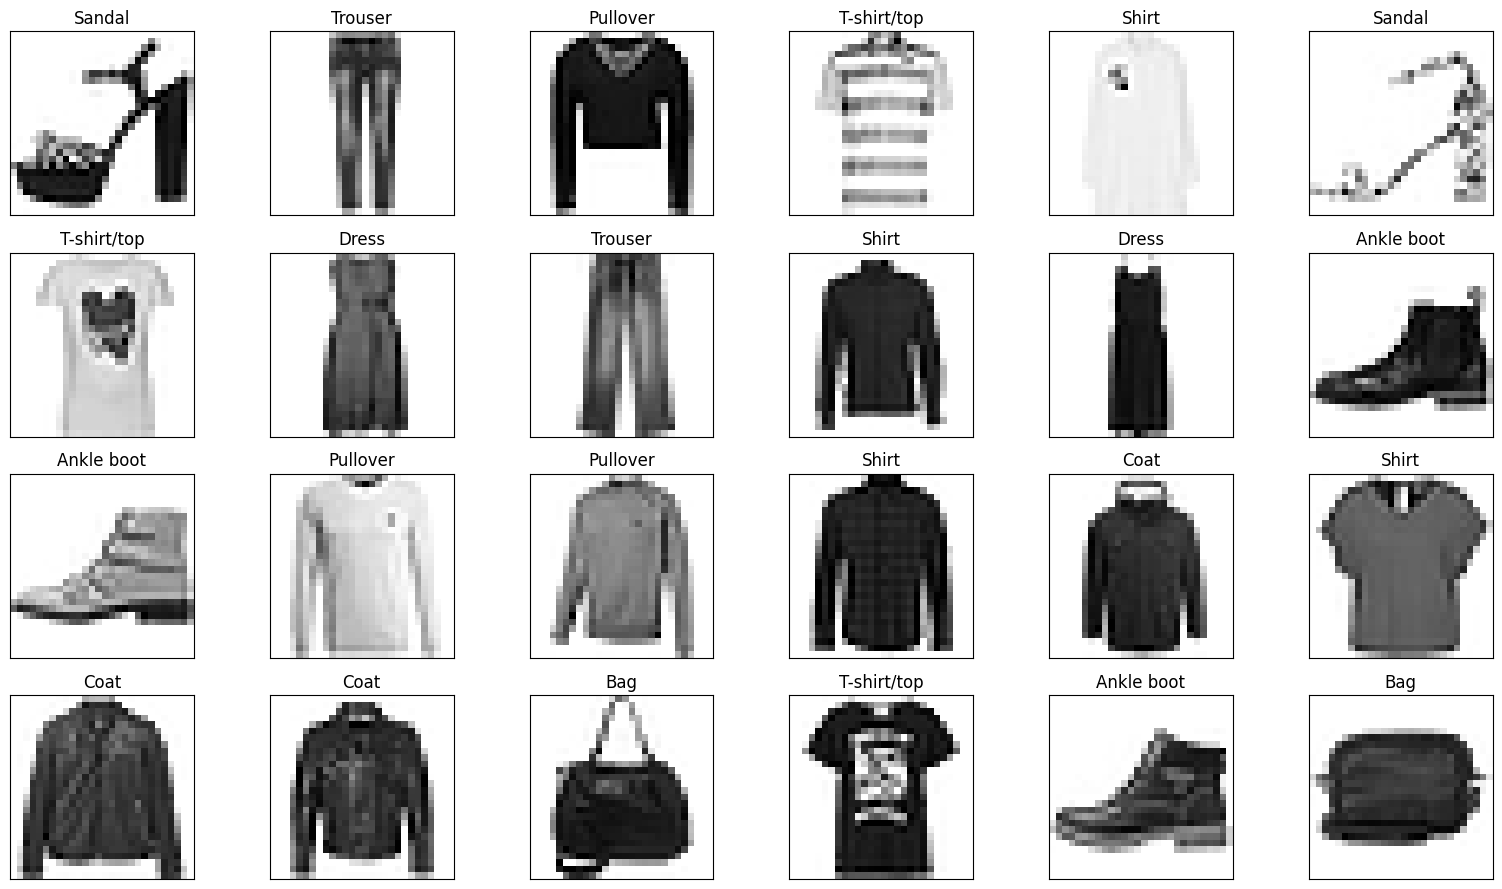

In [394]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 28, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(class_names[target])

plt.tight_layout()

**Reshape data**

In [395]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [396]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

Normalize Data

In [397]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

**Transform into catagorical data**

In [398]:
from tensorflow.keras.utils import to_categorical
# Assuming y_train was not previously one-hot encoded
y_train = to_categorical(y_train)

In [399]:
y_train.shape

(60000, 10)

In [400]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [401]:
# Assuming y_test was not previously one-hot encoded
y_test = to_categorical(y_test)

In [402]:
y_test.shape

(10000, 10)

**Create CNN**

In [403]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

**Add Layers**

In [404]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [405]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [406]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [407]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [408]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [409]:
cnn.add(Flatten())

In [410]:
cnn.add(Dense(units=128, activation='relu'))

In [411]:
cnn.add(Dense(units=10, activation='softmax'))

**Print summary**

In [412]:
cnn.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

**Visualize model Structure**

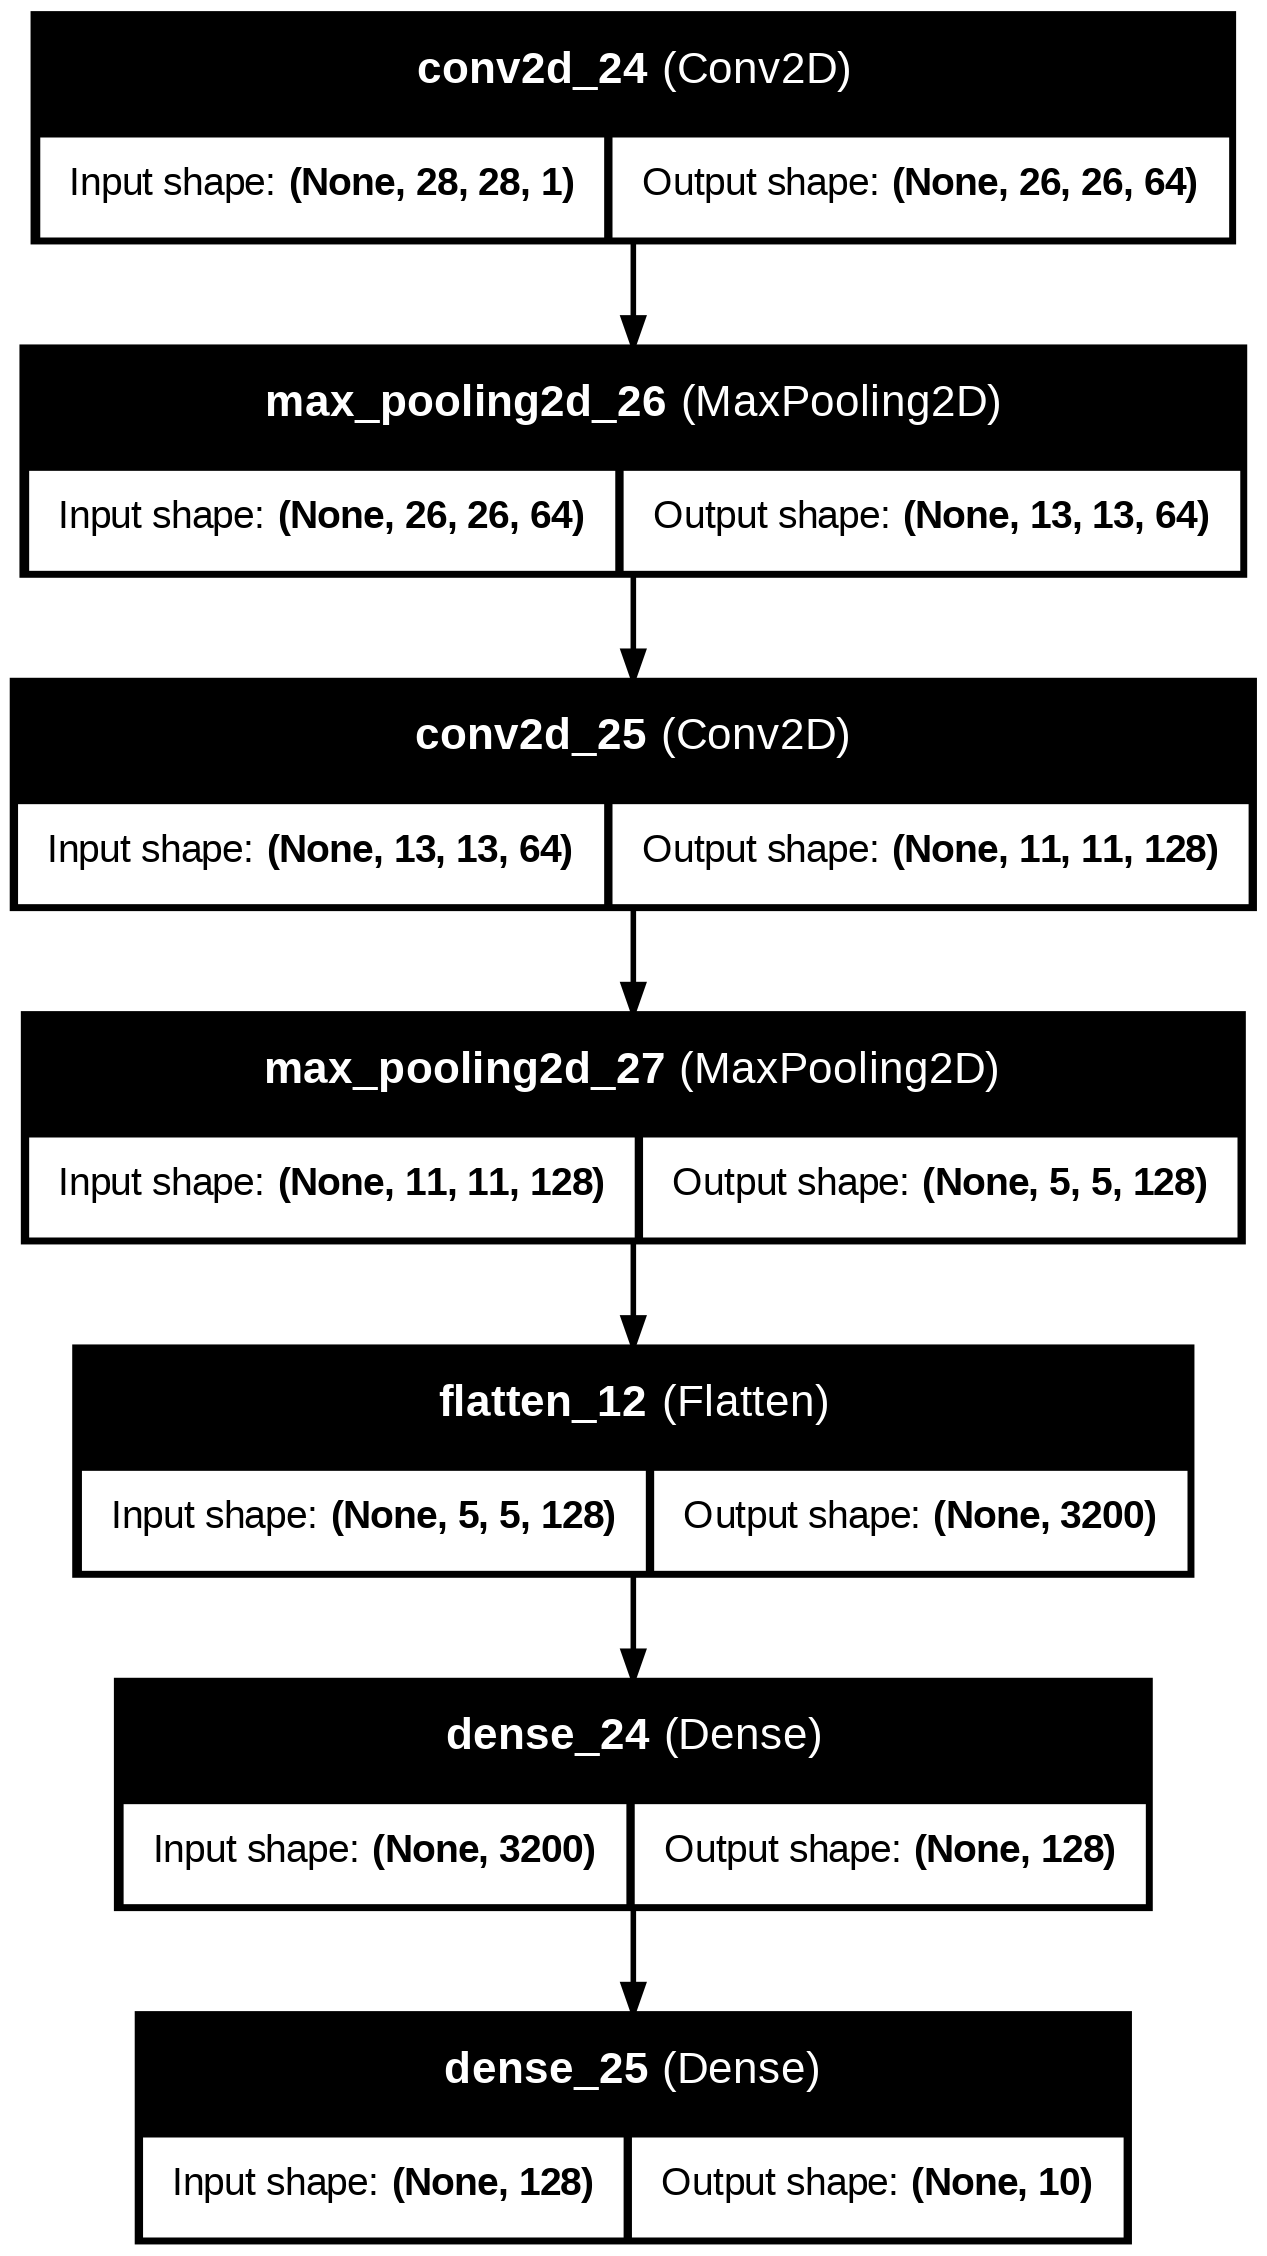

In [413]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

**Compile model**

In [414]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

**Train and Evaluate model**

In [415]:
import time

start_time = time.time()

cnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

end_time = time.time()


Epoch 1/10
375/375 - 5s - 14ms/step - accuracy: 0.8094 - loss: 0.5267 - val_accuracy: 0.8562 - val_loss: 0.4085
Epoch 2/10
375/375 - 2s - 7ms/step - accuracy: 0.8785 - loss: 0.3369 - val_accuracy: 0.8838 - val_loss: 0.3270
Epoch 3/10
375/375 - 3s - 7ms/step - accuracy: 0.8964 - loss: 0.2868 - val_accuracy: 0.8903 - val_loss: 0.3065
Epoch 4/10
375/375 - 2s - 6ms/step - accuracy: 0.9061 - loss: 0.2562 - val_accuracy: 0.9049 - val_loss: 0.2644
Epoch 5/10
375/375 - 2s - 6ms/step - accuracy: 0.9154 - loss: 0.2311 - val_accuracy: 0.9098 - val_loss: 0.2569
Epoch 6/10
375/375 - 2s - 6ms/step - accuracy: 0.9241 - loss: 0.2075 - val_accuracy: 0.9128 - val_loss: 0.2483
Epoch 7/10
375/375 - 2s - 6ms/step - accuracy: 0.9309 - loss: 0.1883 - val_accuracy: 0.9081 - val_loss: 0.2535
Epoch 8/10
375/375 - 3s - 7ms/step - accuracy: 0.9355 - loss: 0.1715 - val_accuracy: 0.9092 - val_loss: 0.2555
Epoch 9/10
375/375 - 2s - 6ms/step - accuracy: 0.9448 - loss: 0.1516 - val_accuracy: 0.9128 - val_loss: 0.2502


In [416]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9047 - loss: 0.2959


In [417]:
loss

0.2862040102481842

In [418]:
accuracy

0.9050999879837036

**Rerun model with MNIST**

In [419]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [420]:
X_train.shape

(60000, 28, 28)

In [421]:
y_train.shape

(60000,)

In [422]:
X_test.shape

(10000, 28, 28)

In [423]:
y_test.shape

(10000,)

In [424]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

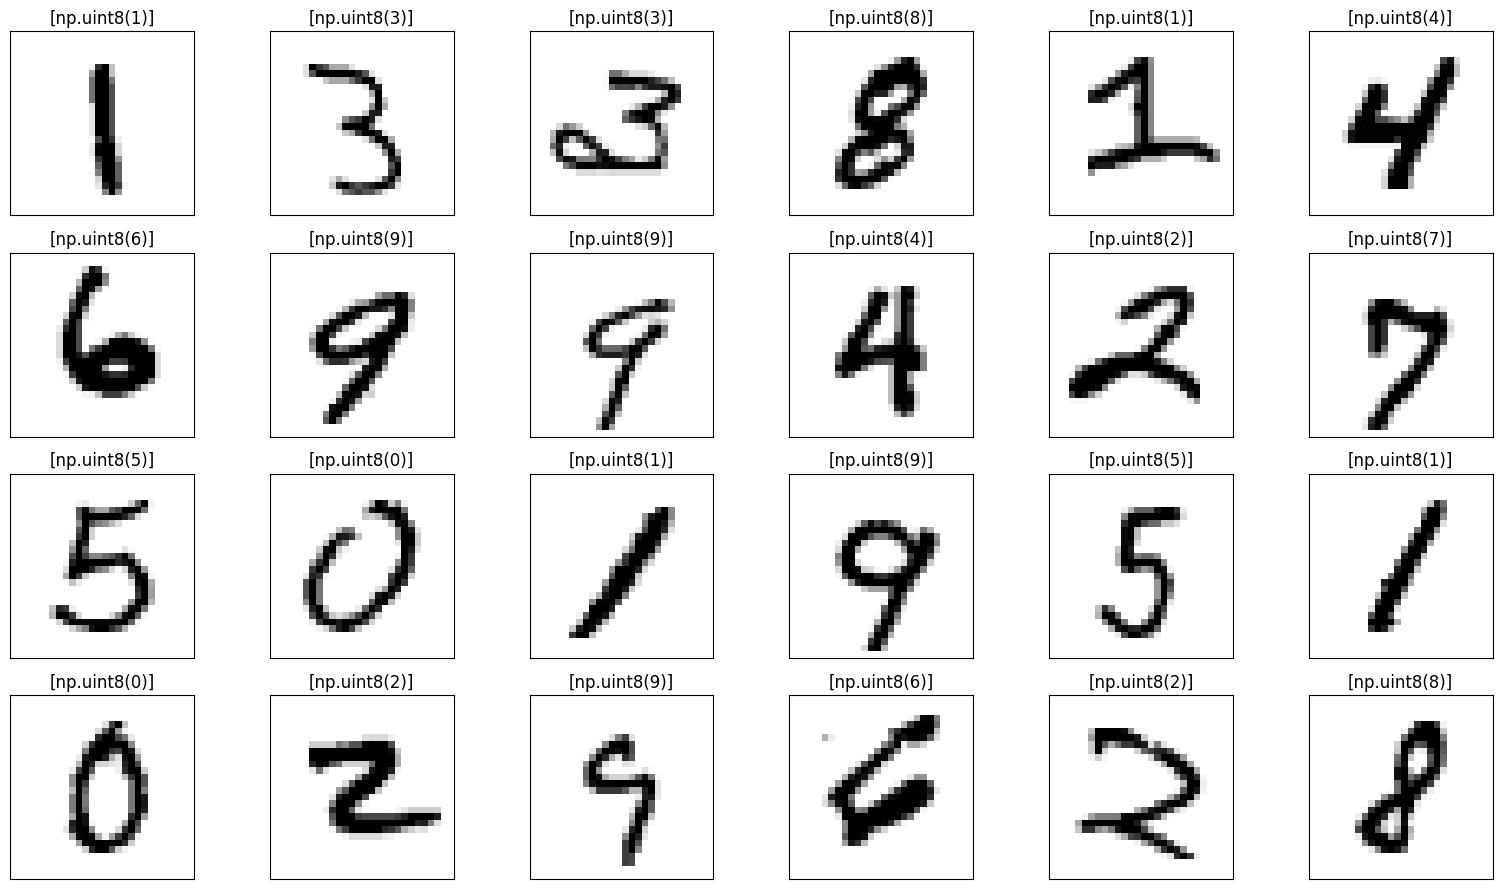

In [425]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 28, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title([target])

plt.tight_layout()

In [426]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [427]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [428]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [429]:
from tensorflow.keras.utils import to_categorical
# Assuming y_train was not previously one-hot encoded
y_train = to_categorical(y_train)

In [430]:
y_train.shape

(60000, 10)

In [431]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [432]:
# Assuming y_test was not previously one-hot encoded
y_test = to_categorical(y_test)

In [433]:
y_test.shape

(10000, 10)

In [434]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [435]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [436]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [437]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [438]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [439]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [440]:
cnn.add(Flatten())

In [441]:
cnn.add(Dense(units=128, activation='relu'))

In [442]:
cnn.add(Dense(units=10, activation='softmax'))

In [443]:
cnn.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

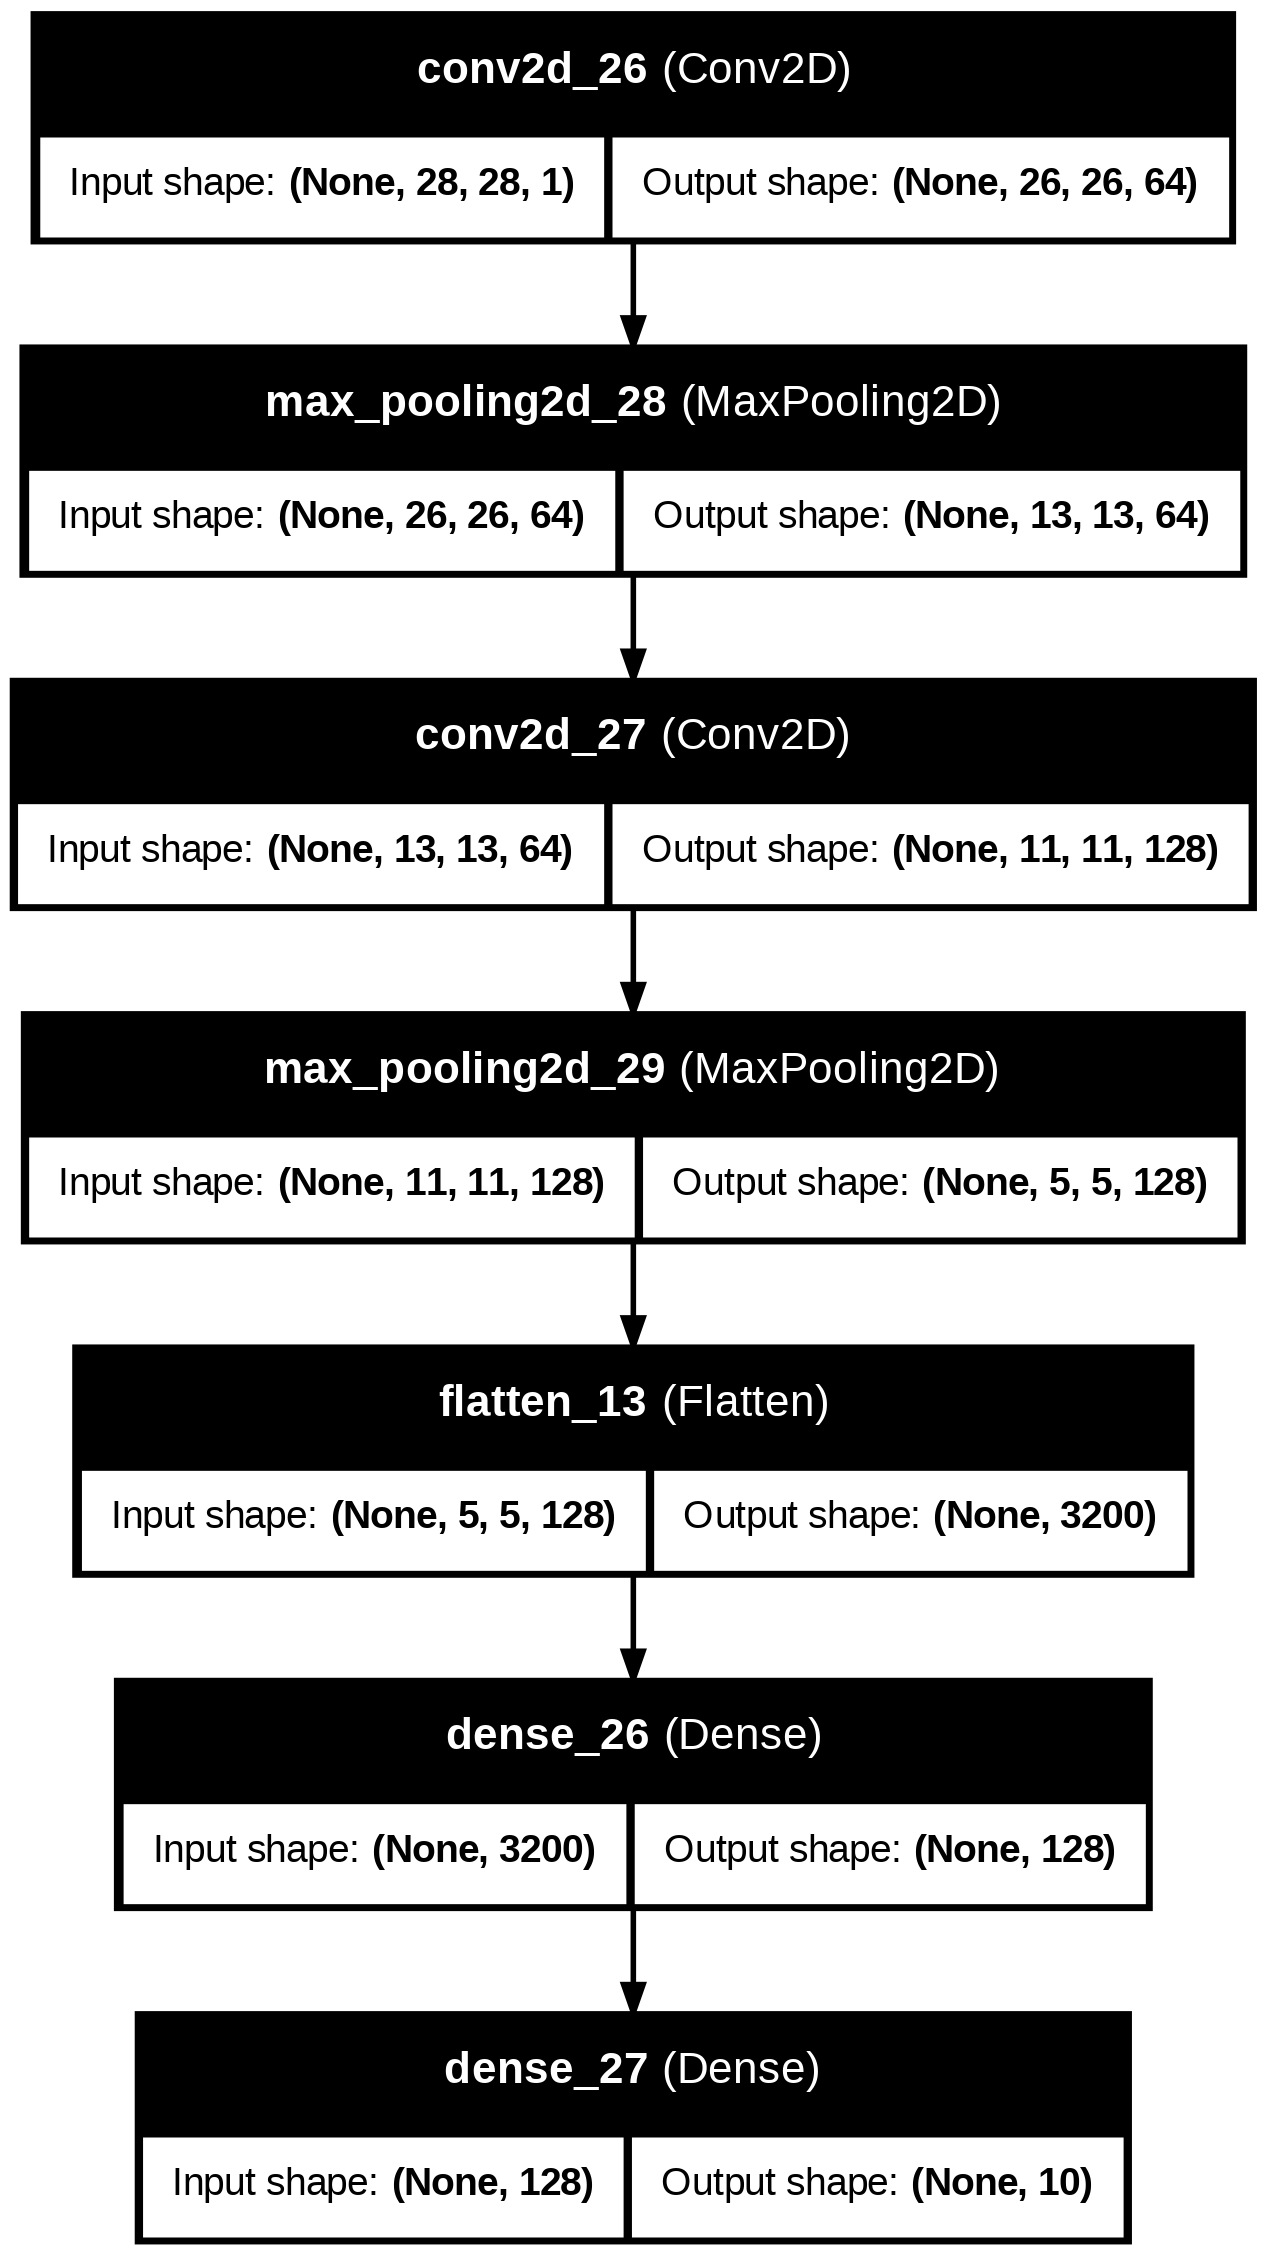

In [444]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

In [445]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [446]:
start_time2 = time.time()

cnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

end_time2 = time.time()

Epoch 1/10
375/375 - 6s - 16ms/step - accuracy: 0.9419 - loss: 0.1975 - val_accuracy: 0.9803 - val_loss: 0.0643
Epoch 2/10
375/375 - 2s - 6ms/step - accuracy: 0.9823 - loss: 0.0558 - val_accuracy: 0.9856 - val_loss: 0.0483
Epoch 3/10
375/375 - 2s - 6ms/step - accuracy: 0.9883 - loss: 0.0372 - val_accuracy: 0.9866 - val_loss: 0.0447
Epoch 4/10
375/375 - 2s - 6ms/step - accuracy: 0.9914 - loss: 0.0272 - val_accuracy: 0.9861 - val_loss: 0.0454
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9887 - val_loss: 0.0400
Epoch 6/10
375/375 - 2s - 6ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9879 - val_loss: 0.0416
Epoch 7/10
375/375 - 2s - 6ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.9966 - loss: 0.0099 - val_accuracy: 0.9893 - val_loss: 0.0438
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9876 - val_loss: 0.0506


In [447]:
loss2, accuracy2 = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0460


In [448]:
loss2

0.03707553818821907

In [449]:
accuracy2

0.9900000095367432

In [450]:
print('Fashion MNIST accuracy: ', accuracy)
print('MNIST accuracy: ', accuracy2)

print(f"Fashion MNIST Training time: {end_time - start_time} seconds")
print(f"MNIST Training time: {end_time2 - start_time2} seconds")

Fashion MNIST accuracy:  0.9050999879837036
MNIST accuracy:  0.9900000095367432
Fashion MNIST Training time: 27.789443254470825 seconds
MNIST Training time: 28.802241325378418 seconds
